In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# for preprocessing, ML models and evaluation
from sklearn.preprocessing import StandardScaler          
from sklearn.model_selection import train_test_split     
from sklearn.linear_model import LinearRegression 


In [2]:
dataset = pd.read_csv("cancer.csv", encoding = "ISO-8859-1")
print(dataset.head())

                          County  Population  deathRate  incidenceRate  \
0         Iosco County, Michigan       25345      193.4          406.2   
1        Mineral County, Montana        4251      188.8          538.8   
2            Lake County, Oregon        7829      139.2          397.2   
3  Pittsylvania County, Virginia       62194      176.8          399.0   
4             Hall County, Texas        3138      223.2          415.8   

   medIncome  povertyPercent  MedianAge  MedianAgeMale  MedianAgeFemale  \
0      37122            19.0      624.0           51.6             52.5   
1      36449            17.3      619.2           52.3             50.7   
2      40328            19.3      579.6           48.2             48.5   
3      44207            14.6      546.0           44.2             46.7   
4      33324            24.5      536.4           42.8             45.2   

   AvgHouseholdSize  ...  PctBachDeg25_Over  PctUnemployed16_Over  \
0              2.20  ...           

In [3]:
print(dataset.shape)

(3047, 25)


In [4]:
dataset.describe().T.style.background_gradient()

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   County                  3047 non-null   object 
 1   Population              3047 non-null   int64  
 2   deathRate               3047 non-null   float64
 3   incidenceRate           3047 non-null   float64
 4   medIncome               3047 non-null   int64  
 5   povertyPercent          3047 non-null   float64
 6   MedianAge               3047 non-null   float64
 7   MedianAgeMale           3047 non-null   float64
 8   MedianAgeFemale         3047 non-null   float64
 9   AvgHouseholdSize        3047 non-null   float64
 10  PctMarriedHouseholds    3047 non-null   float64
 11  PctNoHS18_24            3047 non-null   float64
 12  PctHS18_24              3047 non-null   float64
 13  PctBachDeg18_24         3047 non-null   float64
 14  PctHS25_Over            3047 non-null   

In [29]:
dataset.isnull().sum()

Population                0
deathRate                 0
incidenceRate             0
medIncome                 0
povertyPercent            0
MedianAge                 0
MedianAgeMale             0
MedianAgeFemale           0
AvgHouseholdSize          0
PctMarriedHouseholds      0
PctNoHS18_24              0
PctHS18_24                0
PctBachDeg18_24           0
PctHS25_Over              0
PctBachDeg25_Over         0
PctUnemployed16_Over      0
PctPrivateCoverage        0
PctEmpPrivCoverage        0
PctPublicCoverage         0
PctPublicCoverageAlone    0
PctWhite                  0
PctBlack                  0
PctAsian                  0
PctOtherRace              0
dtype: int64

In [7]:
dataset['county'] = ''
dataset['State'] = ''

for i, row in dataset.iterrows():
    values = row['County'].split(',')
    dataset.at[i, 'county'] = values[0].strip()
    dataset.at[i, 'State'] = values[1].strip()

print(dataset.head())

                          County  Population  deathRate  incidenceRate  \
0         Iosco County, Michigan       25345      193.4          406.2   
1        Mineral County, Montana        4251      188.8          538.8   
2            Lake County, Oregon        7829      139.2          397.2   
3  Pittsylvania County, Virginia       62194      176.8          399.0   
4             Hall County, Texas        3138      223.2          415.8   

   medIncome  povertyPercent  MedianAge  MedianAgeMale  MedianAgeFemale  \
0      37122            19.0      624.0           51.6             52.5   
1      36449            17.3      619.2           52.3             50.7   
2      40328            19.3      579.6           48.2             48.5   
3      44207            14.6      546.0           44.2             46.7   
4      33324            24.5      536.4           42.8             45.2   

   AvgHouseholdSize  ...  PctPrivateCoverage  PctEmpPrivCoverage  \
0              2.20  ...            

In [8]:
dataset = dataset.drop(columns = ['County'])

In [9]:
dataset["State"].value_counts()

Texas                   233
Georgia                 155
Virginia                125
Kentucky                120
Missouri                115
Kansas                  102
Illinois                102
Iowa                     99
North Carolina           99
Tennessee                95
Indiana                  92
Minnesota                87
Ohio                     87
Michigan                 83
Mississippi              82
Nebraska                 80
Oklahoma                 77
Arkansas                 75
Wisconsin                72
Pennsylvania             67
Florida                  66
Louisiana                64
Alabama                  63
New York                 62
Colorado                 60
South Dakota             59
California               57
West Virginia            55
North Dakota             51
Montana                  48
South Carolina           46
Idaho                    42
Washington               39
Oregon                   36
New Mexico               32
Utah                

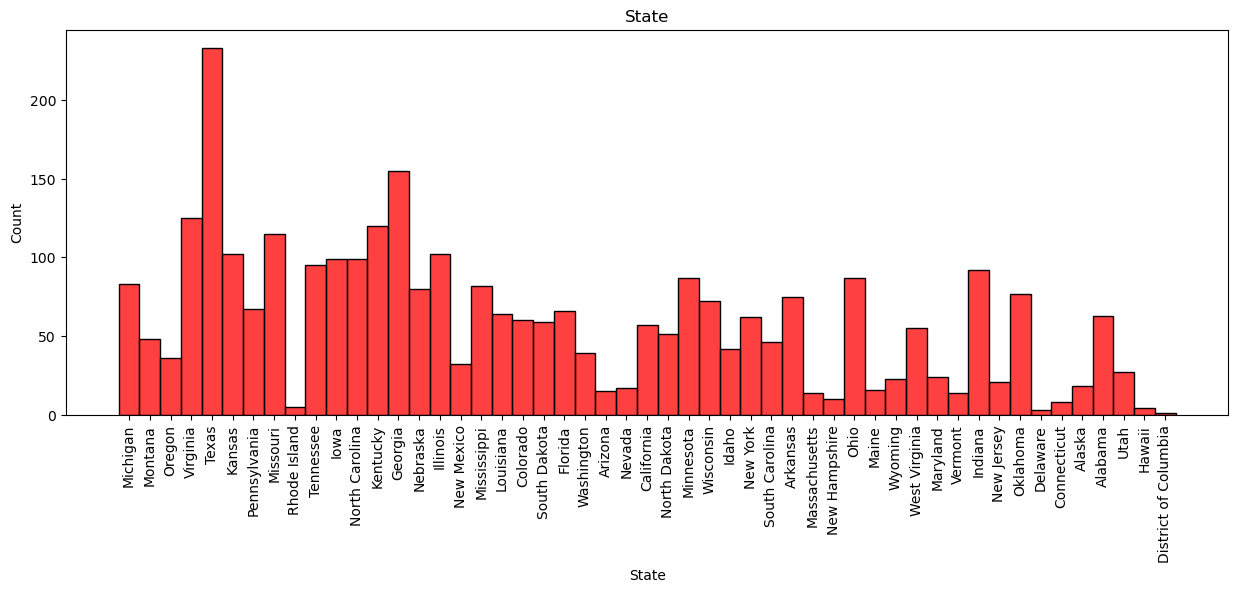

In [10]:
fig, axes = plt.subplots(figsize = (15, 5))
sns.histplot(x = dataset['State'],color = 'red').set(title = 'State')
plt.xticks(rotation=90)
fig.show()

In [11]:
fig = px.histogram(dataset, x = 'State', y = 'deathRate' , barmode = 'group', title = "Cancer By State")
fig.update_layout(xaxis = {'categoryorder': 'total descending'})
fig.show()

In [12]:
dataset = dataset.drop(columns = ['county','State'])

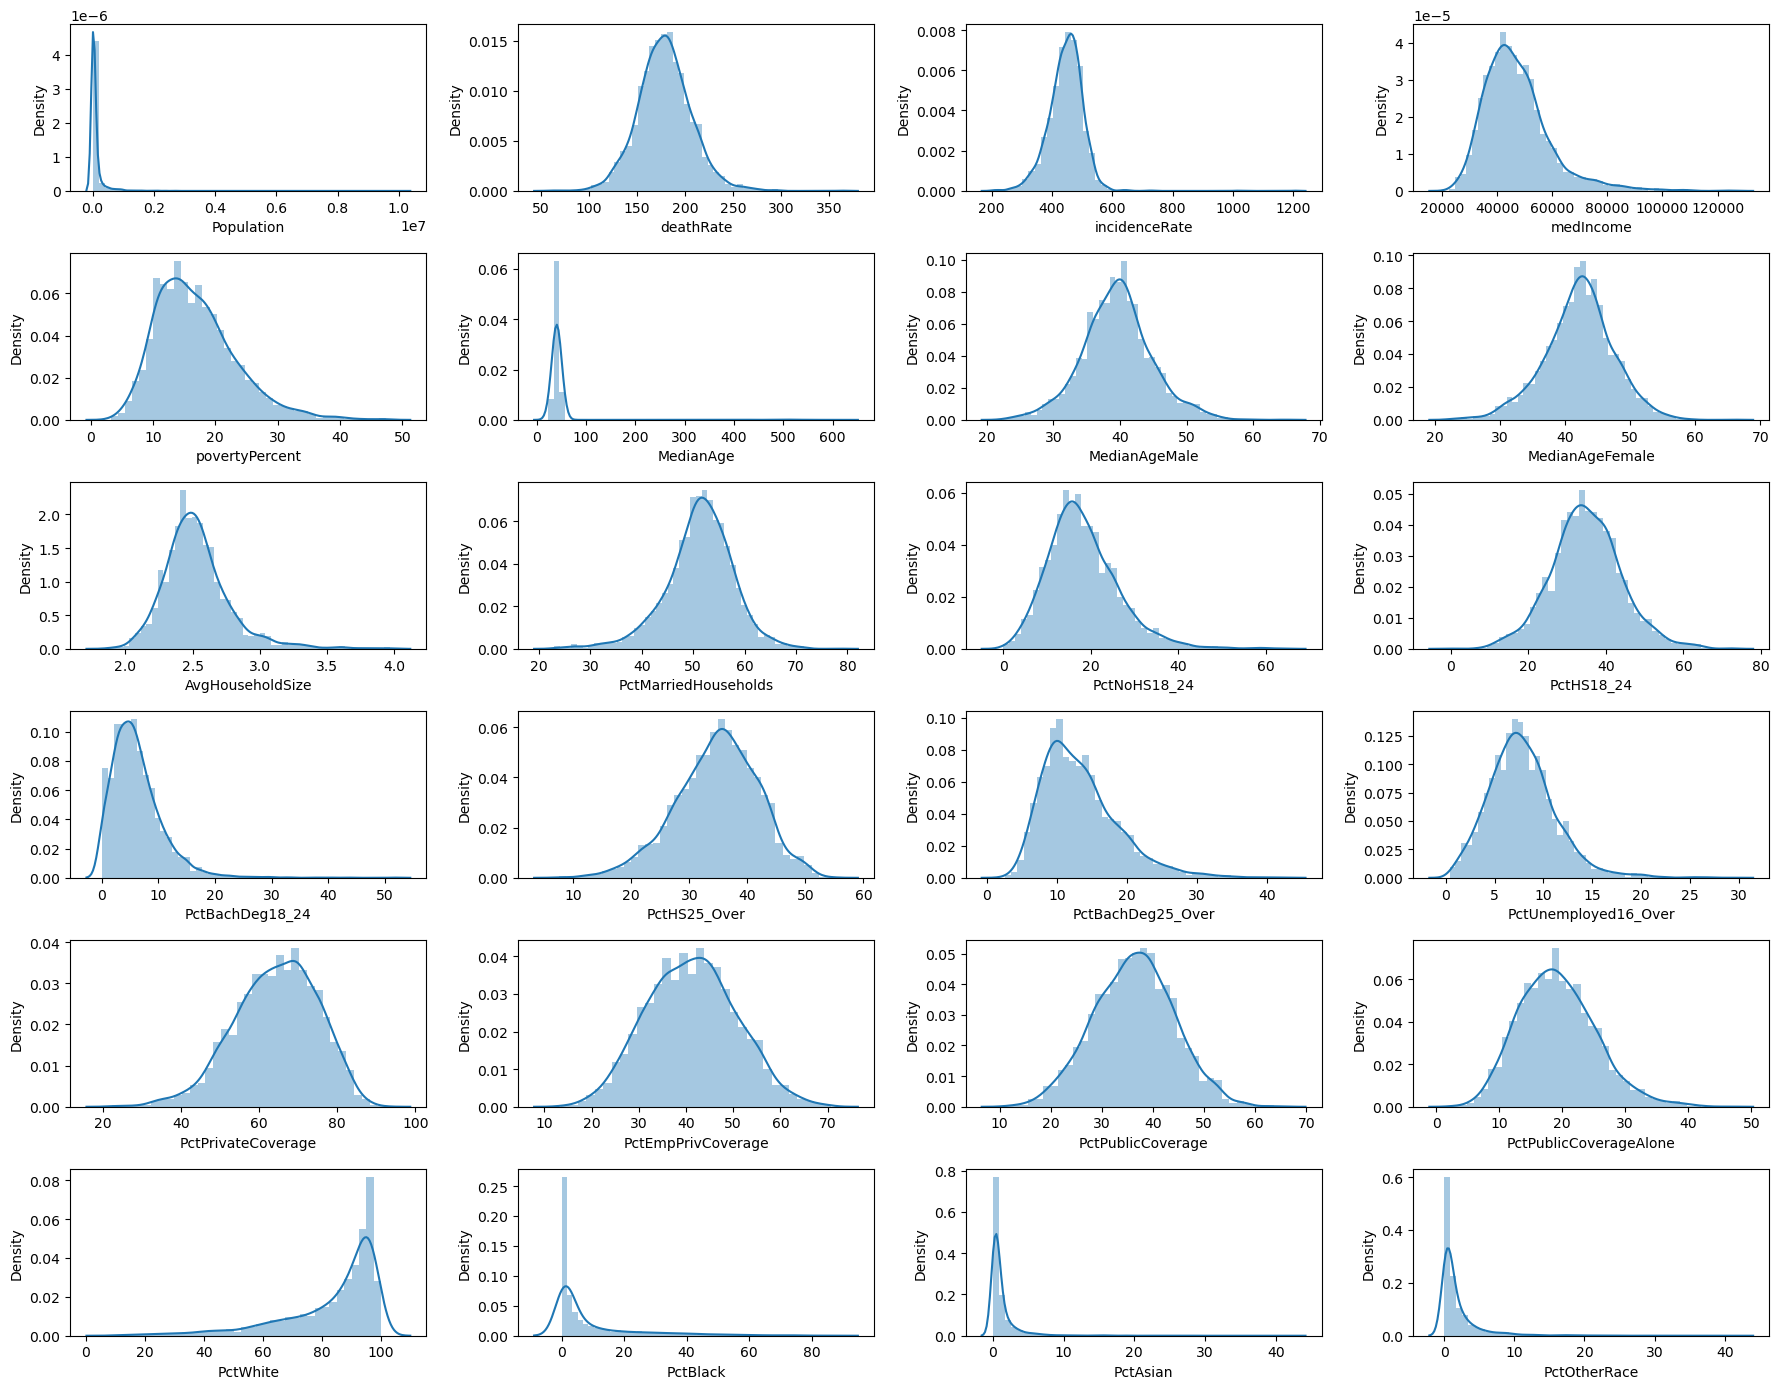

In [13]:
fig, axes = plt.subplots(6, 4, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(dataset.columns[:]):
  plot = sns.distplot(dataset[c] ,ax=axes[i])
plt.tight_layout()

Analysis of above graph 
*   Most of the features follow the normal distribution
*   PctWhite feature is left skewed
*   Population, MedianAge,PctBlack, PctAsian, PctOtherRace features are right skewed 

Left skewed - mean is less than the median

Right skewed - mean is greater than the median


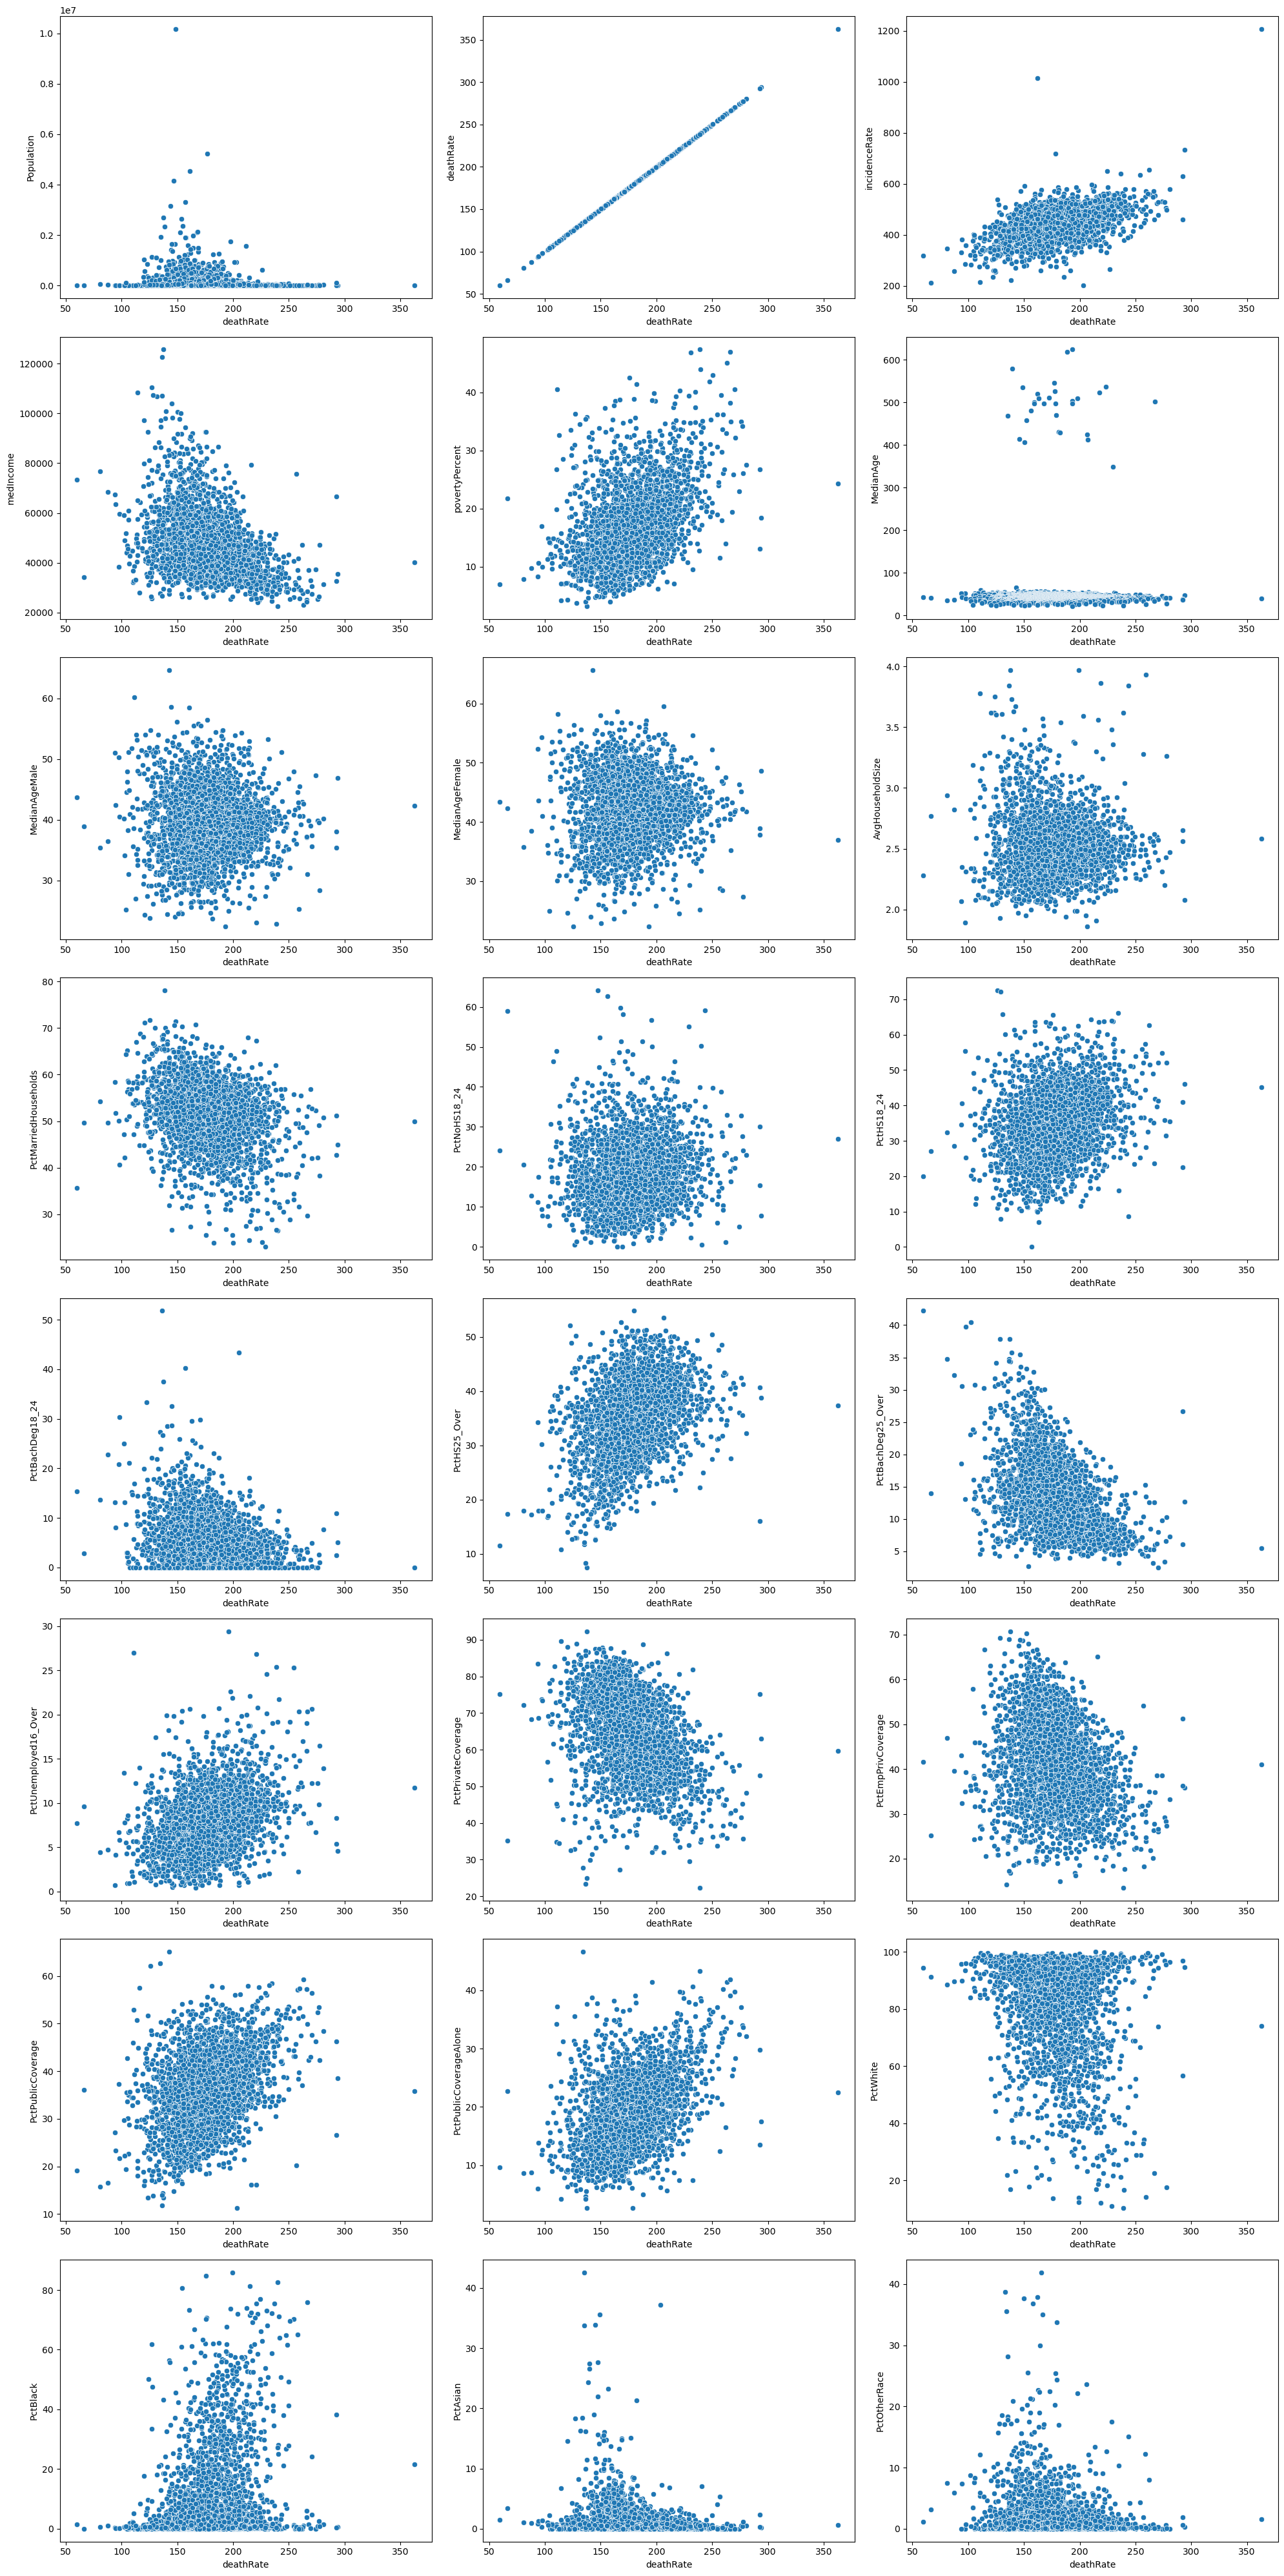

In [14]:
fig, axes = plt.subplots(8, 3, figsize=(20, 40))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(dataset.columns[:]):
  plot = sns.scatterplot(x="deathRate",y=c,data=dataset,ax=axes[i])
plt.tight_layout()

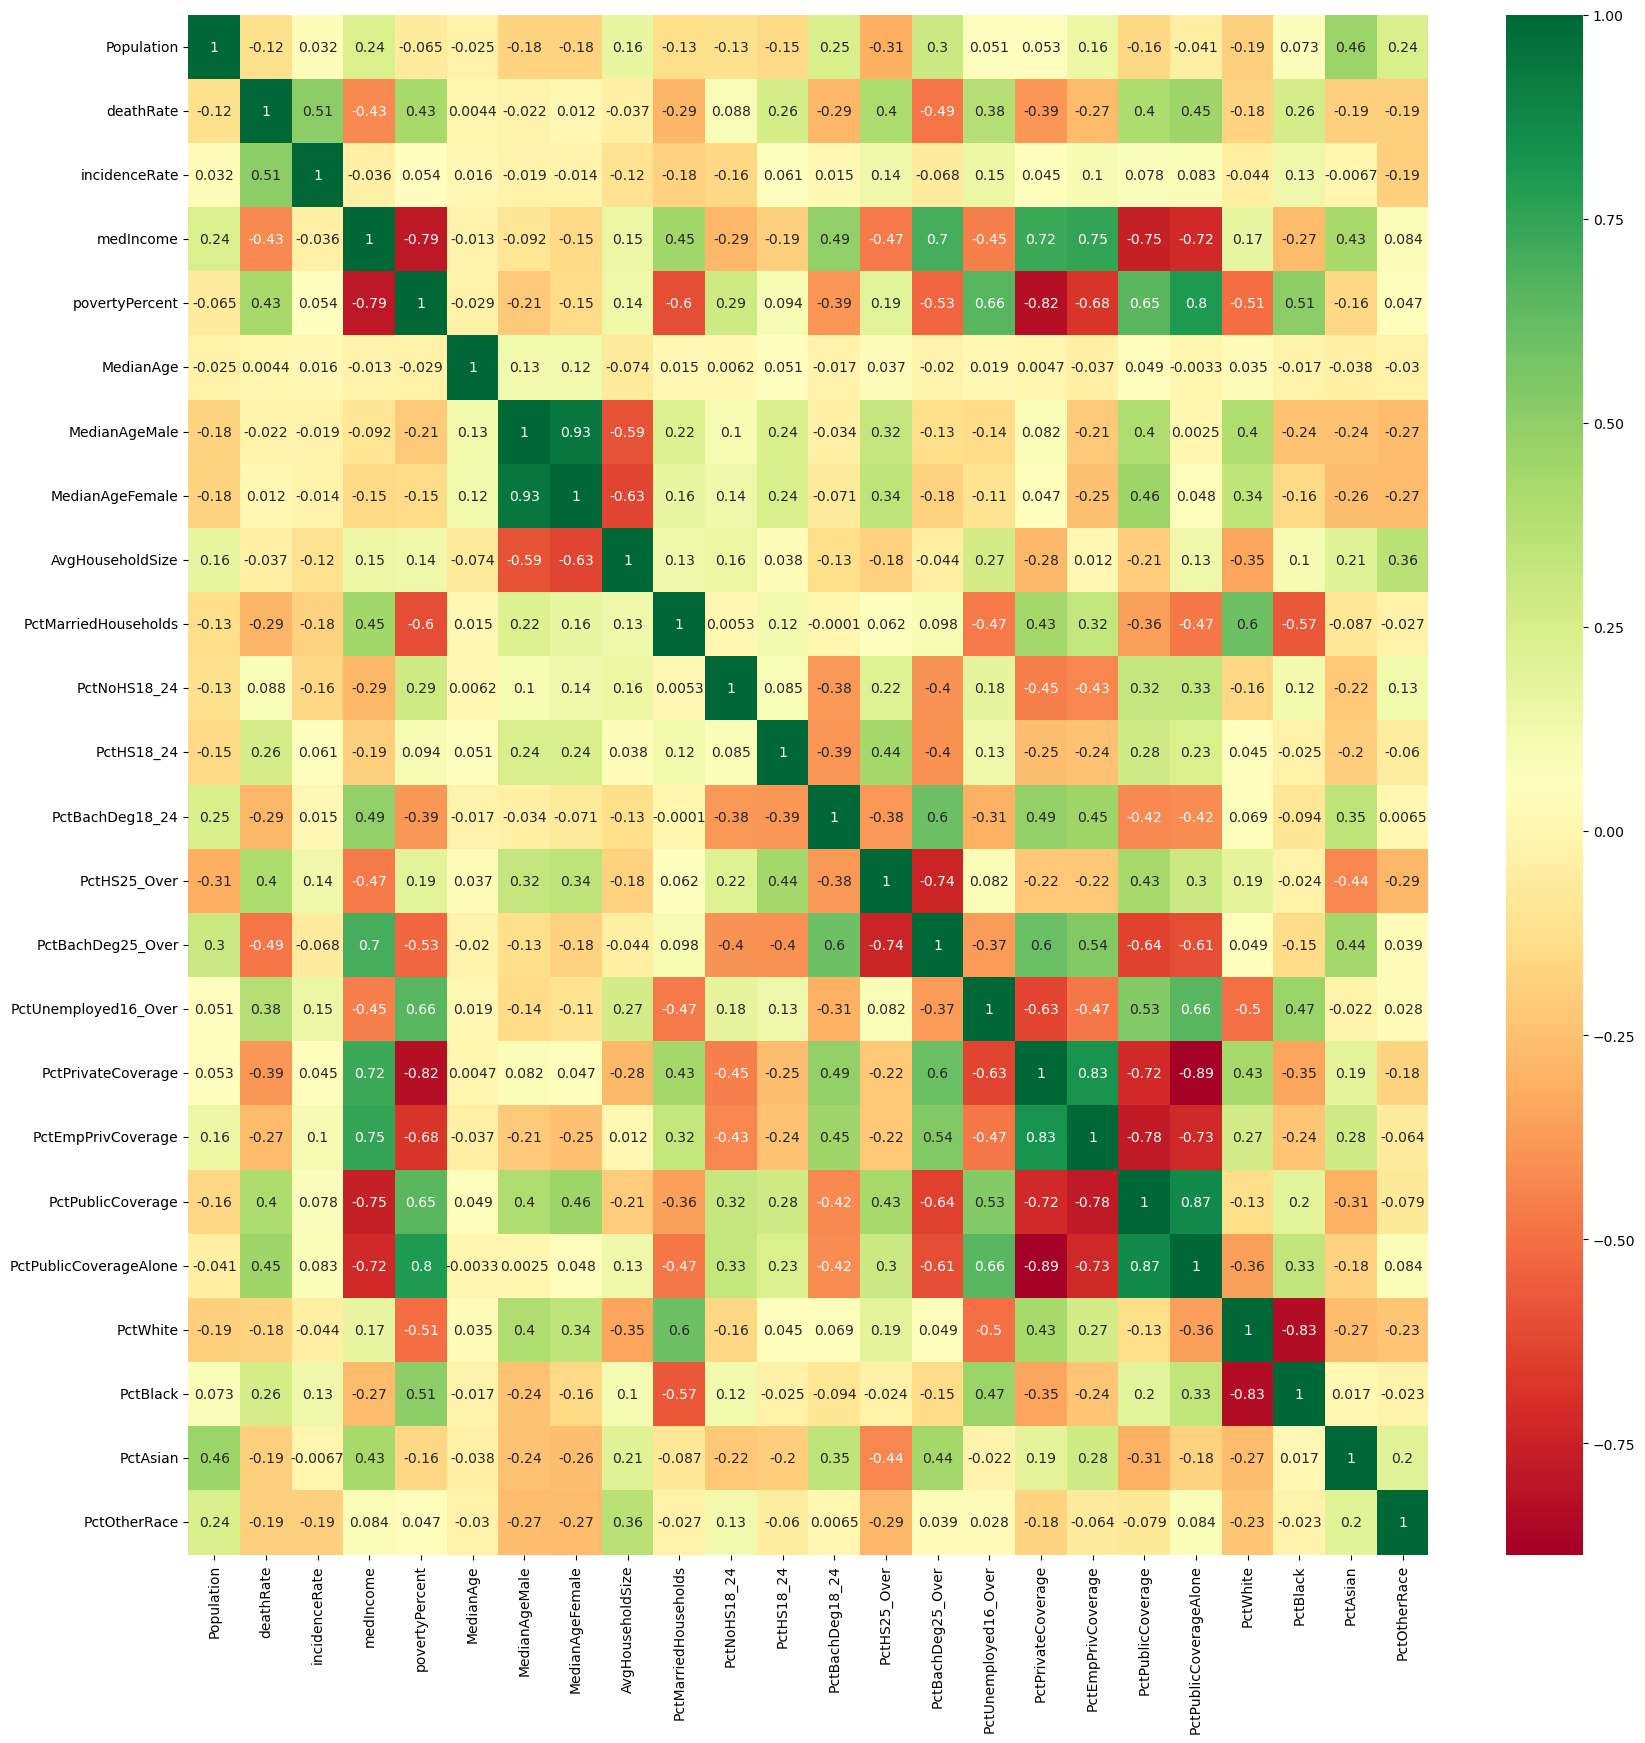

In [15]:
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

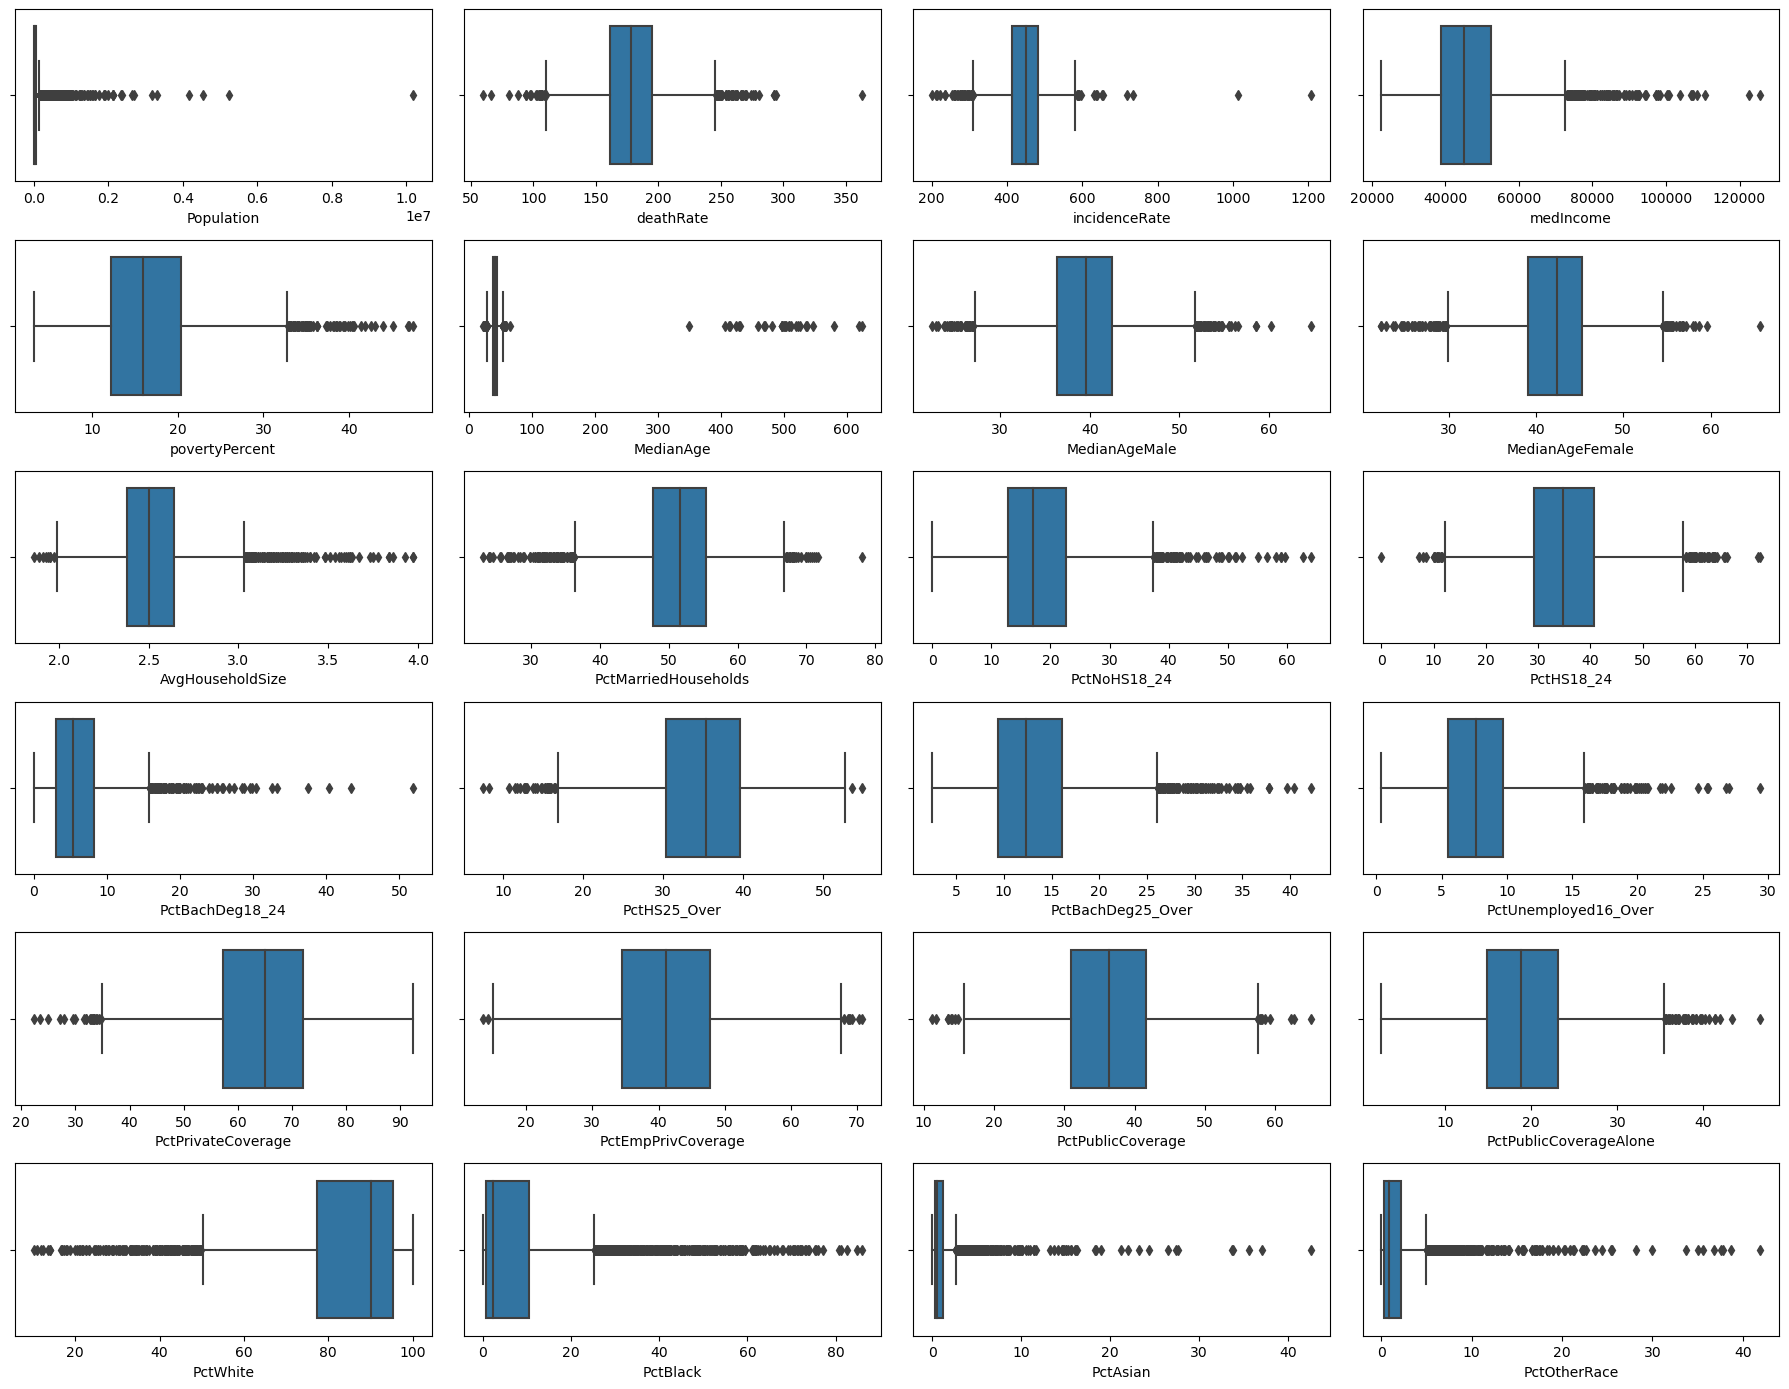

In [16]:
fig, axes = plt.subplots(6, 4, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(dataset.columns[:]):
  plot = sns.boxplot(data=dataset, x=c, ax=axes[i])
plt.tight_layout()

-there are some outliers in these columns

 Population, MedianAge

In [17]:
X = dataset.drop('deathRate',axis='columns')
#print(X.shape)
#X
Y = dataset.deathRate

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [19]:
for i in X_train.select_dtypes(include=['float64','int64']):
    q1 = X_train[i].quantile(0.25)                 
    q3 = X_train[i].quantile(0.75)
    iqr = q3 - q1
    whisker_width = 1.5
    lower_whisker = q1 - whisker_width*iqr
    upper_whisker = q3 + whisker_width*iqr
    outlier_train = X_train[(X_train[i] < q1 - whisker_width*iqr) | (X_train[i] > q3 + whisker_width*iqr)]
    X_train.loc[X_train[i]>upper_whisker,i] = upper_whisker

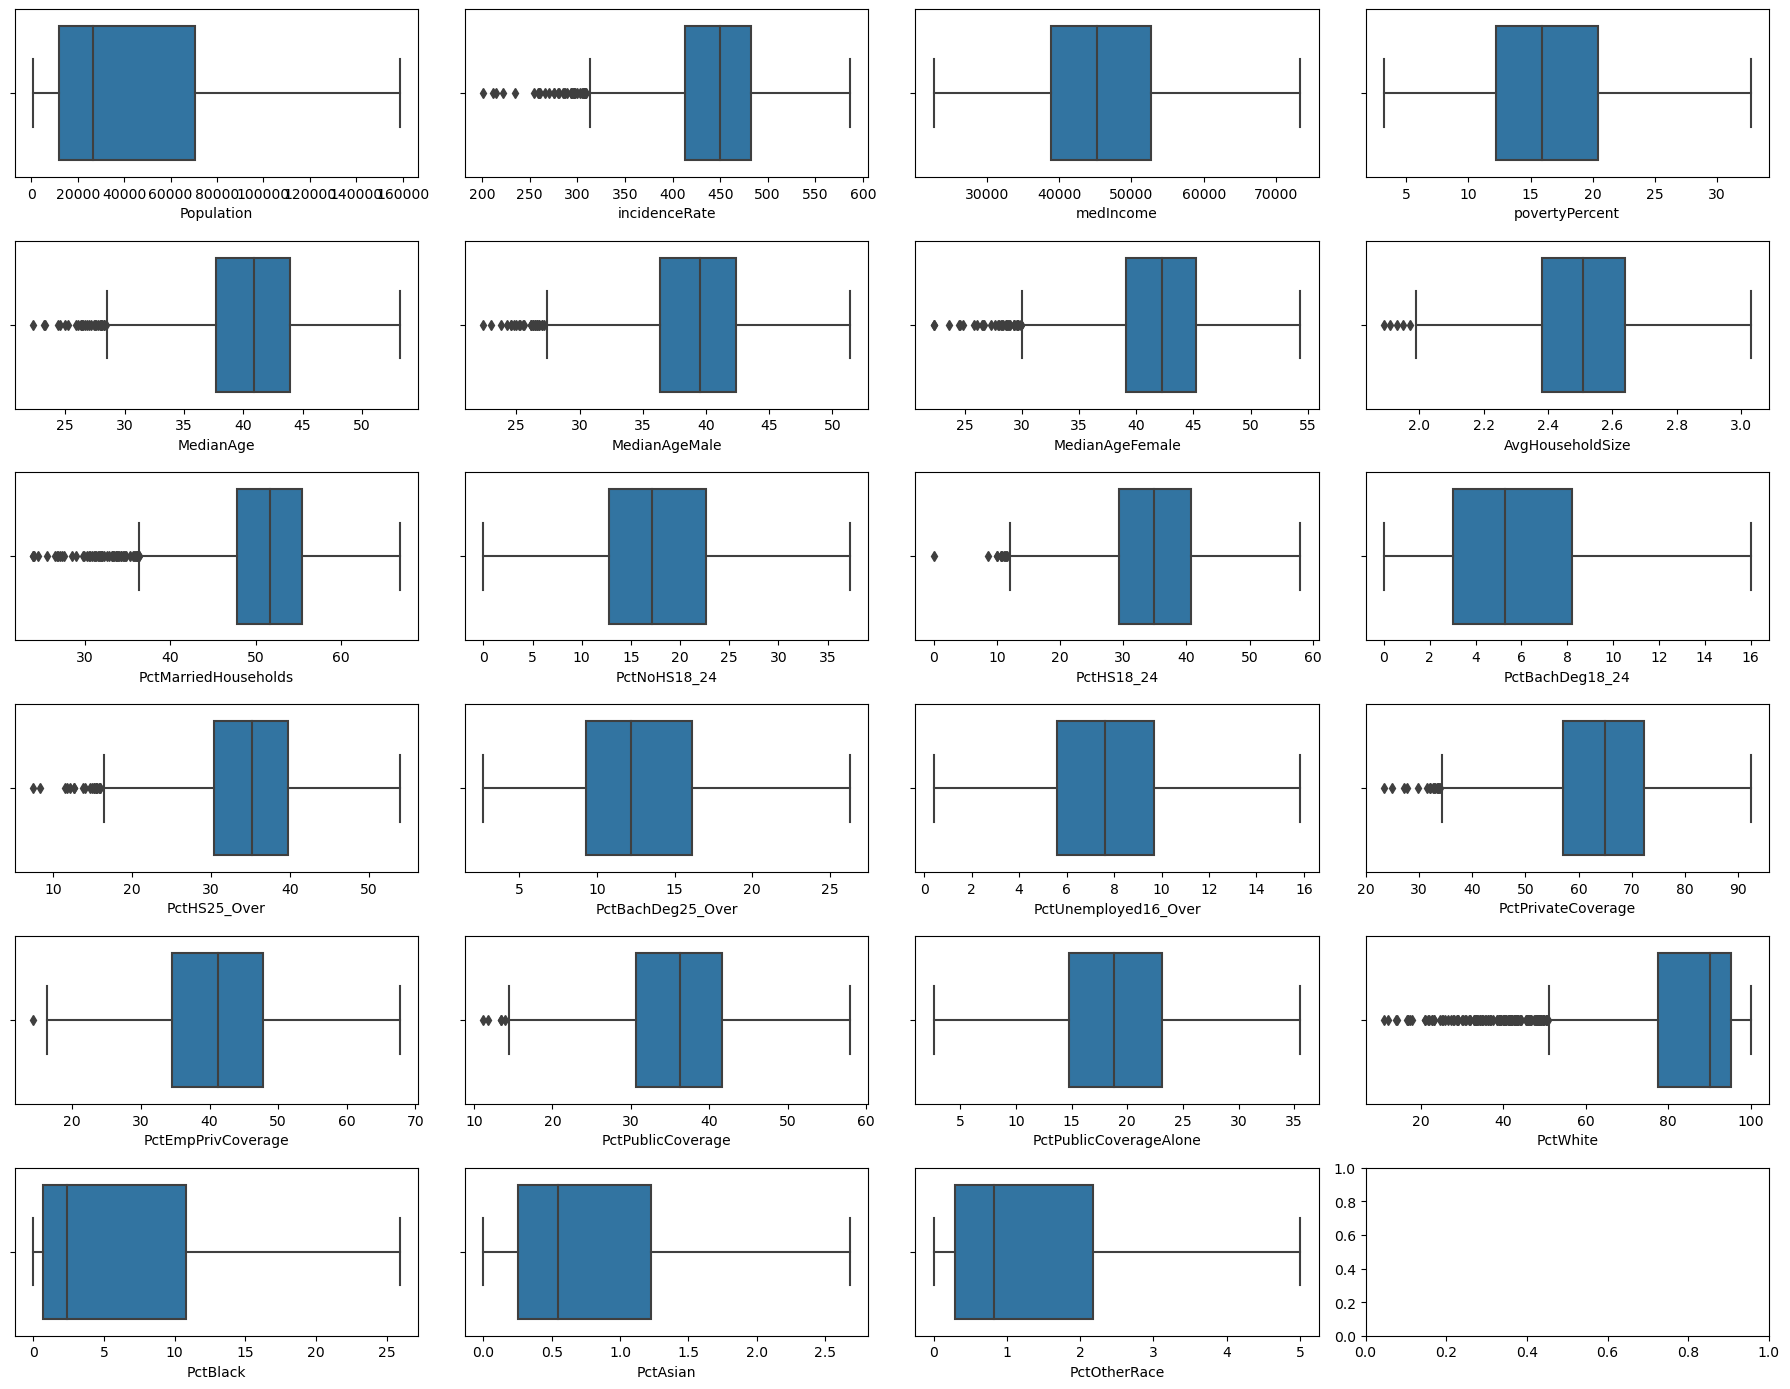

In [20]:
fig, axes = plt.subplots(6, 4, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(X_train.columns):
  plot = sns.boxplot(data=X_train, x=c, ax=axes[i])
plt.tight_layout()

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
#Building the baseline model using the linearRegression algorithm
model=LinearRegression()
model.fit(X_train,Y_train) #training the model
prediction=model.predict(X_test) #predicting the target variable for the unseen data

In [23]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(Y_test, prediction), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(Y_test, prediction), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(Y_test, prediction), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(Y_test, prediction), 2)) 
print("R2 score =", round(sm.r2_score(Y_test, prediction), 2))


Mean absolute error = 14.07
Mean squared error = 339.09
Median absolute error = 10.7
Explain variance score = 0.56
R2 score = 0.56


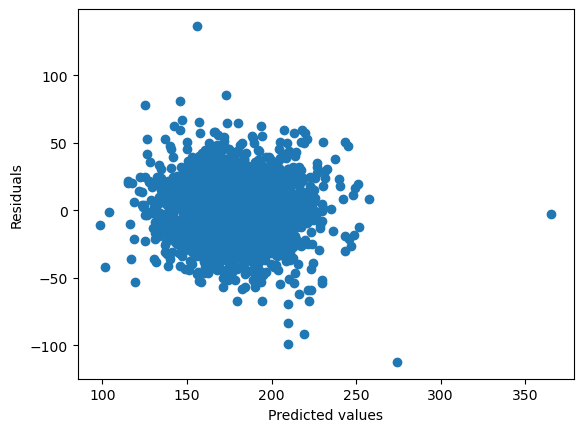

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Fit the multiple linear regression model
model2 = sm.OLS(Y, X).fit()

# Check for linearity by plotting residuals against predicted values
residuals = model2.resid
predicted_values = model2.predict()
plt.scatter(predicted_values, residuals)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

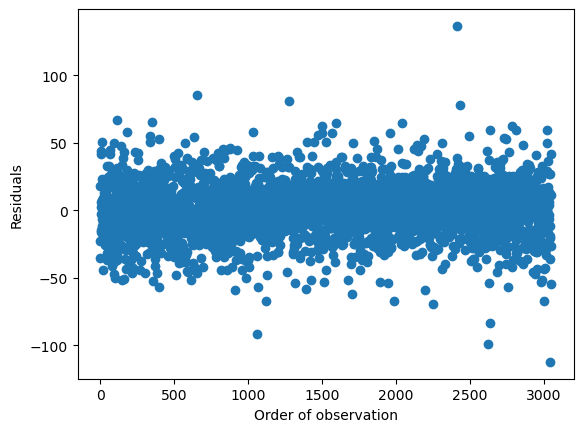

In [26]:
# Check for independence by plotting residuals against time or order of observation
time = np.arange(len(dataset))
plt.scatter(time, residuals)
plt.xlabel("Order of observation")
plt.ylabel("Residuals")
plt.show()

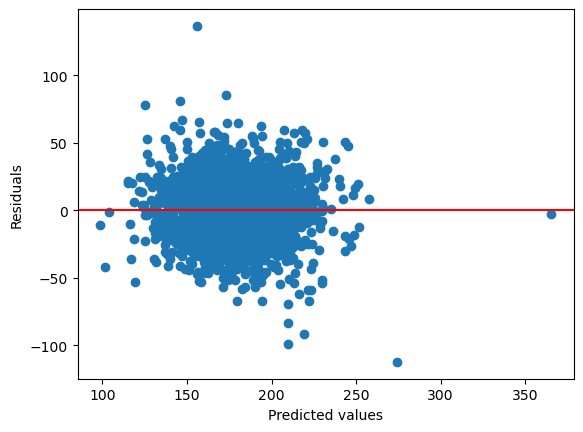

In [27]:
# Check for homoscedasticity by plotting residuals against predicted values
plt.scatter(predicted_values, residuals)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

Shapiro-Wilk test p-value: 1.4546118562501982e-39
Shapiro-Wilk Test Statistic= 0.9807028770446777
Residuals are likely not Gaussian (reject H0)


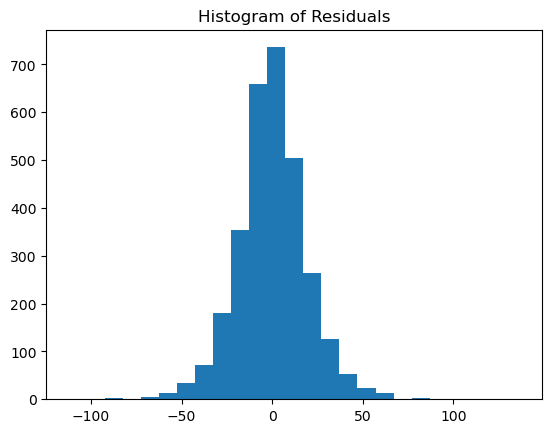

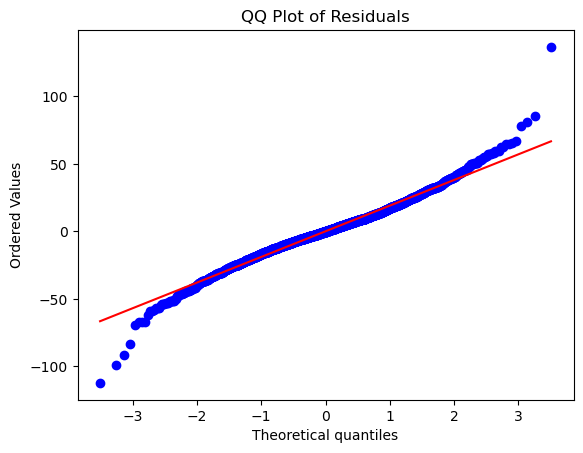

In [28]:
# Normality
import numpy as np
import scipy.stats as stats
from scipy.stats import normaltest
from scipy.stats import shapiro
# Test normality of residuals using the Shapiro-Wilk test and QQ plot
stat, p = normaltest(residuals)
print('Shapiro-Wilk test p-value:', p)
stat, p = shapiro(residuals)
print('Shapiro-Wilk Test Statistic=',stat)
alpha = 0.05
if p > alpha:
    print('Residuals are likely Gaussian (fail to reject H0)')
else:
    print('Residuals are likely not Gaussian (reject H0)')
    
fig, ax = plt.subplots()
_, _, _ = ax.hist(residuals, bins=25)
ax.set_title('Histogram of Residuals')
plt.show()
fig, ax = plt.subplots()
res = stats.probplot(residuals, plot=ax)
ax.set_title('QQ Plot of Residuals')
plt.show()